In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error

In [69]:
life_df = pd.read_csv('Life Expectancy Data.csv')
life_df = life_df.dropna()
life_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [70]:
life_df = life_df.drop(['Country', 'Status'], axis = 1).sample(n = 100, random_state = 13)

life_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2740 to 1449
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             100 non-null    int64  
 1   Life expectancy                  100 non-null    float64
 2   Adult Mortality                  100 non-null    float64
 3   infant deaths                    100 non-null    int64  
 4   Alcohol                          100 non-null    float64
 5   percentage expenditure           100 non-null    float64
 6   Hepatitis B                      100 non-null    float64
 7   Measles                          100 non-null    int64  
 8    BMI                             100 non-null    float64
 9   under-five deaths                100 non-null    int64  
 10  Polio                            100 non-null    float64
 11  Total expenditure                100 non-null    float64
 12  Diphtheria             

## Training

In [71]:
X = life_df.drop(['Life expectancy '], axis = 1)
y = life_df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

print('train: R^2: {}'.format(linear_reg.score(X_train, y_train)))
print('test: R^2: {}'.format(linear_reg.score(X_test, y_test)))
print('\nMAE: {}'.format(mean_absolute_error(y_pred, y_test)))

train: R^2: 0.8318699055729054
test: R^2: 0.6525157077224296

MAE: 3.565851174564767


In [72]:
X = life_df.drop(['Life expectancy '], axis = 1)
y = life_df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

ridge_reg = Ridge(alpha = 0.1)

ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)

print('train: R^2: {}'.format(ridge_reg.score(X_train, y_train)))
print('test: R^2: {}'.format(ridge_reg.score(X_test, y_test)))
print('\nMAE: {}'.format(mean_absolute_error(y_pred, y_test)))

train: R^2: 0.8303713335196738
test: R^2: 0.6464939397791718

MAE: 3.5796522290919746


c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.4035e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [73]:
X = life_df.drop(['Life expectancy '], axis = 1)
y = life_df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

lasso_reg = Lasso(alpha = 1, max_iter = 1000)

lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)

print('train: R^2: {}'.format(lasso_reg.score(X_train, y_train)))
print('test: R^2: {}'.format(lasso_reg.score(X_test, y_test)))
print('\nMAE: {}'.format(mean_absolute_error(y_pred, y_test)))

train: R^2: 0.7798423165206242
test: R^2: 0.6891718812934792

MAE: 3.640554817953588


## Visulization

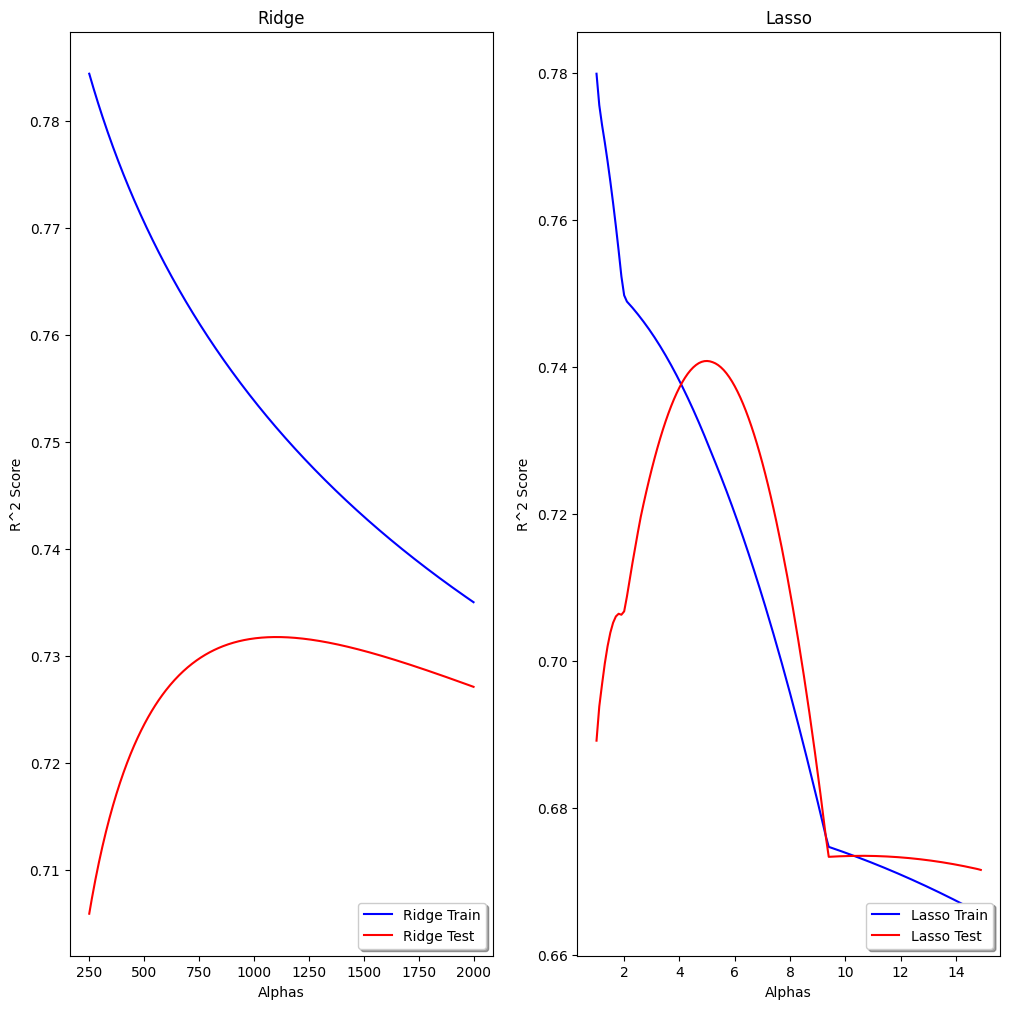

In [81]:
'''
ridge 和 lasso 对比
'''

fig = plt.figure(figsize = (12, 12))
ax_r = fig.add_subplot(121)
ax_l = fig.add_subplot(122)

# 第一步，得到alpha的范围

r_alphas = np.arange(250, 2000, 4)
l_alphas = np.arange(1, 15, 0.1)

# 第二步，使用回归器对所有的x进行预测

r_tr_scores = np.array([])
l_tr_scores = np.array([])

r_te_scores = np.array([])
l_te_scores = np.array([])

for r_alp in r_alphas:
    r_reg = Ridge(alpha = r_alp)
    r_reg.fit(X_train, y_train)

    r_tr_score = r_reg.score(X_train, y_train)
    r_te_score = r_reg.score(X_test, y_test)

    r_tr_scores = np.append(r_tr_scores, r_tr_score)
    r_te_scores = np.append(r_te_scores, r_te_score)

for l_alp in l_alphas:
    l_reg = Lasso(alpha = l_alp)
    l_reg.fit(X_train, y_train)

    l_tr_score = l_reg.score(X_train, y_train)
    l_te_score = l_reg.score(X_test, y_test)

    l_tr_scores = np.append(l_tr_scores, l_tr_score)
    l_te_scores = np.append(l_te_scores, l_te_score)

# 第三步，绘图
ax_r.plot(r_alphas, r_tr_scores, 'b', label = 'Ridge Train')
ax_r.plot(r_alphas, r_te_scores, 'r', label = 'Ridge Test')

ax_r.set_xlabel('Alphas')
ax_r.set_ylabel('R^2 Score')

ax_r.set_title('Ridge')
ax_r.legend(loc = 'lower right', shadow = True)


ax_l.plot(l_alphas, l_tr_scores, 'b', label = 'Lasso Train')
ax_l.plot(l_alphas, l_te_scores, 'r', label = 'Lasso Test')

ax_l.set_xlabel('Alphas')
ax_l.set_ylabel('R^2 Score')

ax_l.set_title('Lasso')
ax_l.legend(loc = 'lower right', shadow = True)

plt.show()